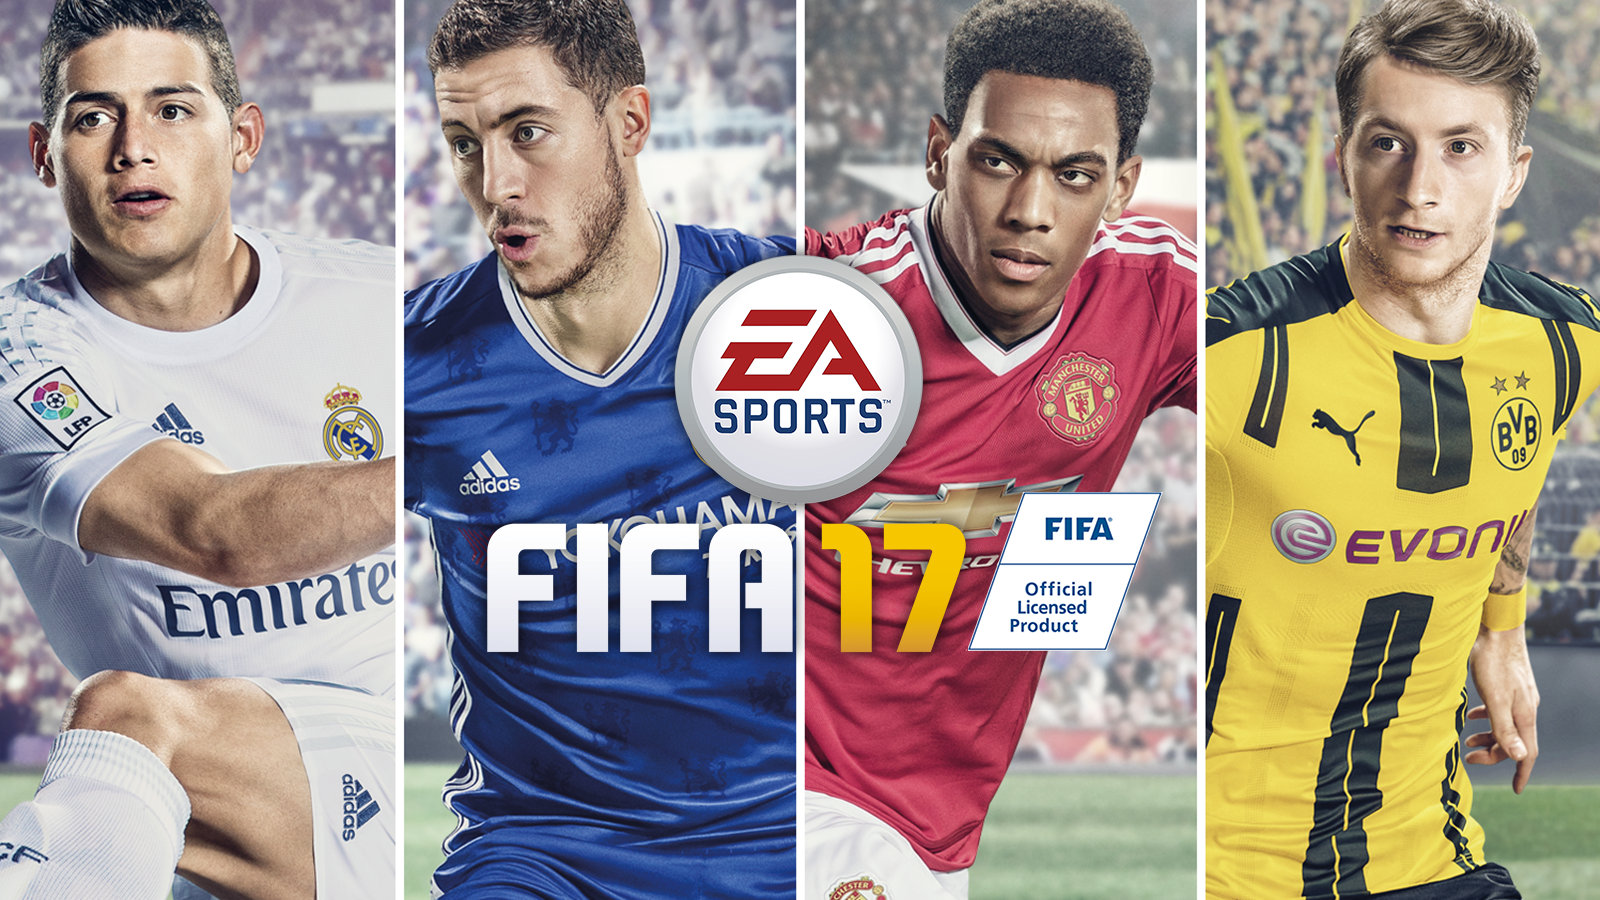

In [1]:
from IPython.display import Image
Image(filename='FIFA 17.jpg')  
#local image saved 

# Header files




In [2]:
import pandas as pd                                      # for reading data, exploring, cleaning, analysing and other reasons.
import numpy as np                                       # for mathematical fast calc. on data.
%matplotlib inline
import matplotlib.pyplot as plt                          #for plotting purposes
import seaborn as sns                                    # for aestheticalluy effective plotting 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import time                                              # for time comparsion between different models

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Loading

In [3]:
df = pd.read_csv('FullData.csv')                        # contains full data, to be analyzed
nat_namesDF = pd.read_csv('NationalNames.csv')          # national Names dataset
club_namesDF = pd.read_csv('ClubNames.csv')             # club names dataset
player_namesDF = pd.read_csv('PlayerNames.csv')         # player names data set


# Data exploring


### 1) full data analysis
### 2) national names data analysis
### 3) club names data analysis
### 4) player names data analysis

In [4]:
print(df.shape)                             #17588 rows, 53 cols.
print(df.head(5))                           
print(df.columns)                           

(17588, 53)
                Name Nationality National_Position  National_Kit  \
0  Cristiano Ronaldo    Portugal                LS           7.0   
1       Lionel Messi   Argentina                RW          10.0   
2             Neymar      Brazil                LW          10.0   
3        Luis Suárez     Uruguay                LS           9.0   
4       Manuel Neuer     Germany                GK           1.0   

           Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  \
0   Real Madrid            LW       7.0   07/01/2009           2021.0      94   
1  FC Barcelona            RW      10.0   07/01/2004           2018.0      93   
2  FC Barcelona            LW      11.0   07/01/2013           2021.0      92   
3  FC Barcelona            ST       9.0   07/11/2014           2021.0      92   
4     FC Bayern            GK       1.0   07/01/2011           2021.0      92   

      ...      Long_Shots Curve Freekick_Accuracy Penalties  Volleys  \
0     ...           

In [5]:
print(df.info())                              # tells us about type of objects in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

In [6]:
print(pd.isnull(df).sum())                #checking null val. for each col 

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

#### National_Kit , National_Position are filled with 16513 nan values maybe because many of the players have not been given a chance in National Team. Also 4 columns that are 'Club_Position','Club_Kit','Club_Joining','Contract_Expiry' have 1 missing value each. So lets find out if, thats a common row, i.e. is it for 1 players who have these missing attributes.  

In [7]:
df_testing = df[['Club_Position','Club_Kit','Club_Joining','Contract_Expiry']].dropna(axis = 0,inplace = False,thresh = 1)    #use of thresh to get the idea
print(df.shape[0])
print(df_testing.shape[0])                           #its coming out to be less than original rows, i.e. assumption was right, only one player have these four attributes empty

#lets find out who is the player with these missing attributes, may be an unnown player.
inds = pd.isnull(df[['Club_Position','Club_Kit']]).any(axis = 1).nonzero()[0] 
print(inds)                                  # 383rd row of original data df has these attributes missing
empty_player = df.iloc[inds,:]
print(empty_player['Name'])                  #Didier Drogba: Chelsea Legend
didierDrogba = empty_player
print(pd.isnull(didierDrogba).sum())         #verifying our result about him, checking nan-valued attributes of him

17588
17587
[383]
383    Didier Drogba
Name: Name, dtype: object
Name                  0
Nationality           0
National_Position     1
National_Kit          1
Club                  0
Club_Position         1
Club_Kit              1
Club_Joining          1
Contract_Expiry       1
Rating                0
Height                0
Weight                0
Preffered_Foot        0
Birth_Date            0
Age                   0
Preffered_Position    0
Work_Rate             0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Speed                 0
Stamina               0
Strength              0
Balance               0
Agility               0

#### Didier Drogba : Chelsea Legend... scored Champions League 2012 final decider in penalty shootout aginst Bayern Munich!!!
##### so I will not remove this row and will fill the data properly( as from internet).


Didier Drogba


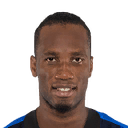

In [8]:
print("Didier Drogba")
from IPython.display import Image
Image(filename='Pictures\Didier Drogba.png')                                 #local saved image


In [9]:
df.loc[inds,'Club_Kit']=11.0                     #avoid chain indexing for avoiding copy = True
                                                 #alternativey with any condition. use: df.loc[df[<some_column_name>] == <condition>, <another_column_name>] = <value_to_add>
print(df.iloc[383,:])                            # I find that he is a free agent(not assigned to any club!, still gonna assign his old club Chelsea)
df.loc[inds,'Club_Position'] = 'CF'
df.loc[inds,'Club'] = 'Chelsea'
df[['Club_Joining','Contract_Expiry']] = df[['Club_Joining','Contract_Expiry']].fillna(axis = 0,method='ffill',inplace = False)  #error if inplace = True 
df.iloc[[383]]

Name                  Didier Drogba
Nationality             Ivory Coast
National_Position               NaN
National_Kit                    NaN
Club                     Free agent
Club_Position                   NaN
Club_Kit                         11
Club_Joining                    NaN
Contract_Expiry                 NaN
Rating                           81
Height                       189 cm
Weight                        80 kg
Preffered_Foot                Right
Birth_Date               03/11/1978
Age                              39
Preffered_Position               ST
Work_Rate              Medium / Low
Weak_foot                         4
Skill_Moves                       3
Ball_Control                     80
Dribbling                        74
Marking                          22
Sliding_Tackle                   29
Standing_Tackle                  32
Aggression                       80
Reactions                        80
Attacking_Position               81
Interceptions               

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
383,Didier Drogba,Ivory Coast,NaN,NaN,Chelsea,CF,11.0,08/19/2014,2018.0,81,...,79,78,84,84,76,6,10,8,11,14


## More analysis...

In [10]:
df.describe(include=['O'])                 #string type data analysis only

,Name,Nationality,National_Position,Club,Club_Position,Club_Joining,Height,Weight,Preffered_Foot,Birth_Date,Preffered_Position,Work_Rate
count,17588,17588,1075,17588,17588,17588,17588,17588,17588,17588,17588,17588
unique,17341,160,27,633,29,1677,50,56,2,6063,292,9
top,Felipe,England,Sub,Free Agents,Sub,07/01/2016,180 cm,75 kg,Right,02/29/1988,CB,Medium / Medium
freq,6,1618,556,232,7492,1193,1529,1404,13494,160,2181,9897


In [11]:
'''
#pd.set_option('display.height', 1000)           #display.height has been deprecated
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)        #for getting all columns displayed
pd.set_option('display.width', 1000)
'''
pd.options.display.max_columns = 500
df.describe()                                    # integer type data

"\n#pd.set_option('display.height', 1000)           #display.height has been deprecated\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)        #for getting all columns displayed\npd.set_option('display.width', 1000)\n"

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.293950,2018.899363,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,55.920173,61.770582,49.592051,46.794064,52.707869,55.853139,49.741073,58.119798,52.396065,65.287867,65.483853,63.476916,65.085854,64.008813,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163353,1.698753,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,17.445464,9.275210,19.407087,20.494715,14.589446,13.485994,18.457977,14.982582,15.616071,14.436296,14.100615,15.477377,12.532989,13.720288,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,7.000000,11.000000,11.000000,10.000000,20.000000,10.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


from contract_expiry, max is 2023( but max. contract can be of 5 years) so we have to check these players.
As such by looking stats, I cant much predict, i will use plotting for better analysis
##### max. Rating is 94, one of Cristiano Ronaldo for sure


In [12]:
print((df.loc[:,'Contract_Expiry']==2023).sum())                           #894 entries, so I will believe in EA Sports for this behavior, and let it remain the same
print("no. of players having rating >=90 in FIFA 17:")
print((df.loc[:,'Rating'] > 89).sum())
print("Their Names: ")
bestRated_players = df[df.loc[:,'Rating']>89]#[['Name','Club','Rating']]    #Ronaldo is the winner as per the Ratings. 2 GKs are present too
bestRated_players

894
no. of players having rating >=90 in FIFA 17:
9
Their Names: 


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193 cm,82 kg,Right,11/07/1990,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185 cm,79 kg,Right,08/21/1988,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183 cm,74 kg,Left,07/16/1989,27,RW,High / Medium,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195 cm,95 kg,Right,10/03/1981,35,ST,Medium / Low,4,4,90,87,15,27,41,84,85,86,20,83,91,76,84,76,69,74,75,93,41,86,72,80,93,90,88,82,82,91,93,9,13,10,15,12


# Analyzing the best rated players 
## Using Radar Chart 

In [13]:
def _scale_data(datas,ranges): #data of 1 row is provided, with every column ranges
    
    (x1,x2) = ranges[0]
    diff = x2-x1
    fact = 0
    scaled_data = []
    for data, (y1,y2) in zip(datas,ranges):
        
        fact = ((data-y1)/(y2-y1))*diff
        scaled_data.append(fact+x1)
    return scaled_data

'''
class RadarChart
'''

class RadarChart():
    
    def __init__(self,fig,attributes,ranges,n_ordinate_levels=6):
        #n_ordinate_levels is for grid scaping, attributes being features, ranges is a list of all feature ranges
        angles = np.arange(0, 360, 360./len(attributes))
        
        '''
        Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height. 
        kwargs are legal Axes kwargs plus projection which sets the projection type of the axes. 
        (For backward compatibility, polar=True may also be provided, which is equivalent to projection='polar'). Valid values for projection are [‘aitoff’, ‘hammer’, ‘lambert’, ‘mollweide’, ‘polar’, ‘rectilinear’].
        Some of these projections support additional kwargs, which may be provided to add_axes(). 
        
        '''

        
        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar=True,label="axis{}".format(i)) for i in range(len(attributes))] #we use label to distinguish b/w different axes, its a must, else we dont get different axes!
            
        _,text = axes[0].set_thetagrids(angles,labels = attributes)
        
        '''
        Set the angles at which to place the theta grids (these
        gridlines are equal along the theta dimension).  *angles* is in
        degrees.
        Return value is a list of tuples (*line*, *label*), where   #here (_,text)
        *line* is :class:`~matplotlib.lines.Line2D` instances and the  
        *label* is :class:`~matplotlib.text.Text` instances.    
        '''
        
        for txt,angle in zip(text,angles):
            txt.set_rotation(angle-90)
            txt.set_size(15)
            
        '''
        Axes contains a Patch patch which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates;
        this patch determines the shape, background and border of the plotting region;
        '''    
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)  #patch is background
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i,ax in enumerate(axes):
            
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""] + [str(int(x)) for x in grid[1:]]                 ## circular grid label, from inner circle to outer circle
            ax.set_rgrids(grid,labels = grid_label,angle=angles[i])              ##rgrid is radia grids
                                                                                #grid here requires, starting circle distances, last circle dist, no. of circles i.e. *ranges[i],n_ordinate_levels
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles,angles[0]])
        self.ranges  = ranges
        self.ax = axes[0]
        
    def plot(self,data,*args,**kwargs):                                    ##for plotting lines
        scaled_data = _scale_data(data,self.ranges)
        self.ax.plot(self.angle,np.r_[scaled_data,scaled_data[0]],*args,**kwargs)
            
    def fill(self,data,*args,**kwargs):
        scaled_data = _scale_data(data,self.ranges)                             ##for filling those lines generated polygon with color
        self.ax.fill(self.angle,np.r_[scaled_data,scaled_data[0]],*args,**kwargs)
        
    def legend(self,*args,**kwargs):                                       ##for labelling row name, i.e about self
        self.ax.legend(*args,**kwargs)
    
        
            
'''
class over 
'''



'\nclass RadarChart\n'

'\nclass over \n'

In [14]:

attributes = ['Ball_Control','Dribbling','Marking','Aggression','Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes']
ranges = [[2**-20, df[attr].max()] for attr in attributes]
top_players = bestRated_players['Name'].unique().tolist()
datas = df[attributes].values
print(datas.shape)
print(type(datas))
print(type(top_players))
top_players
colors = sns.hls_palette(n_colors=len(top_players))
print(type(colors))


(17588, 32)
<class 'numpy.ndarray'>
<class 'list'>


['Cristiano Ronaldo',
 'Lionel Messi',
 'Neymar',
 'Luis Suárez',
 'Manuel Neuer',
 'De Gea',
 'Robert Lewandowski',
 'Gareth Bale',
 'Zlatan Ibrahimović']

<class 'seaborn.palettes._ColorPalette'>


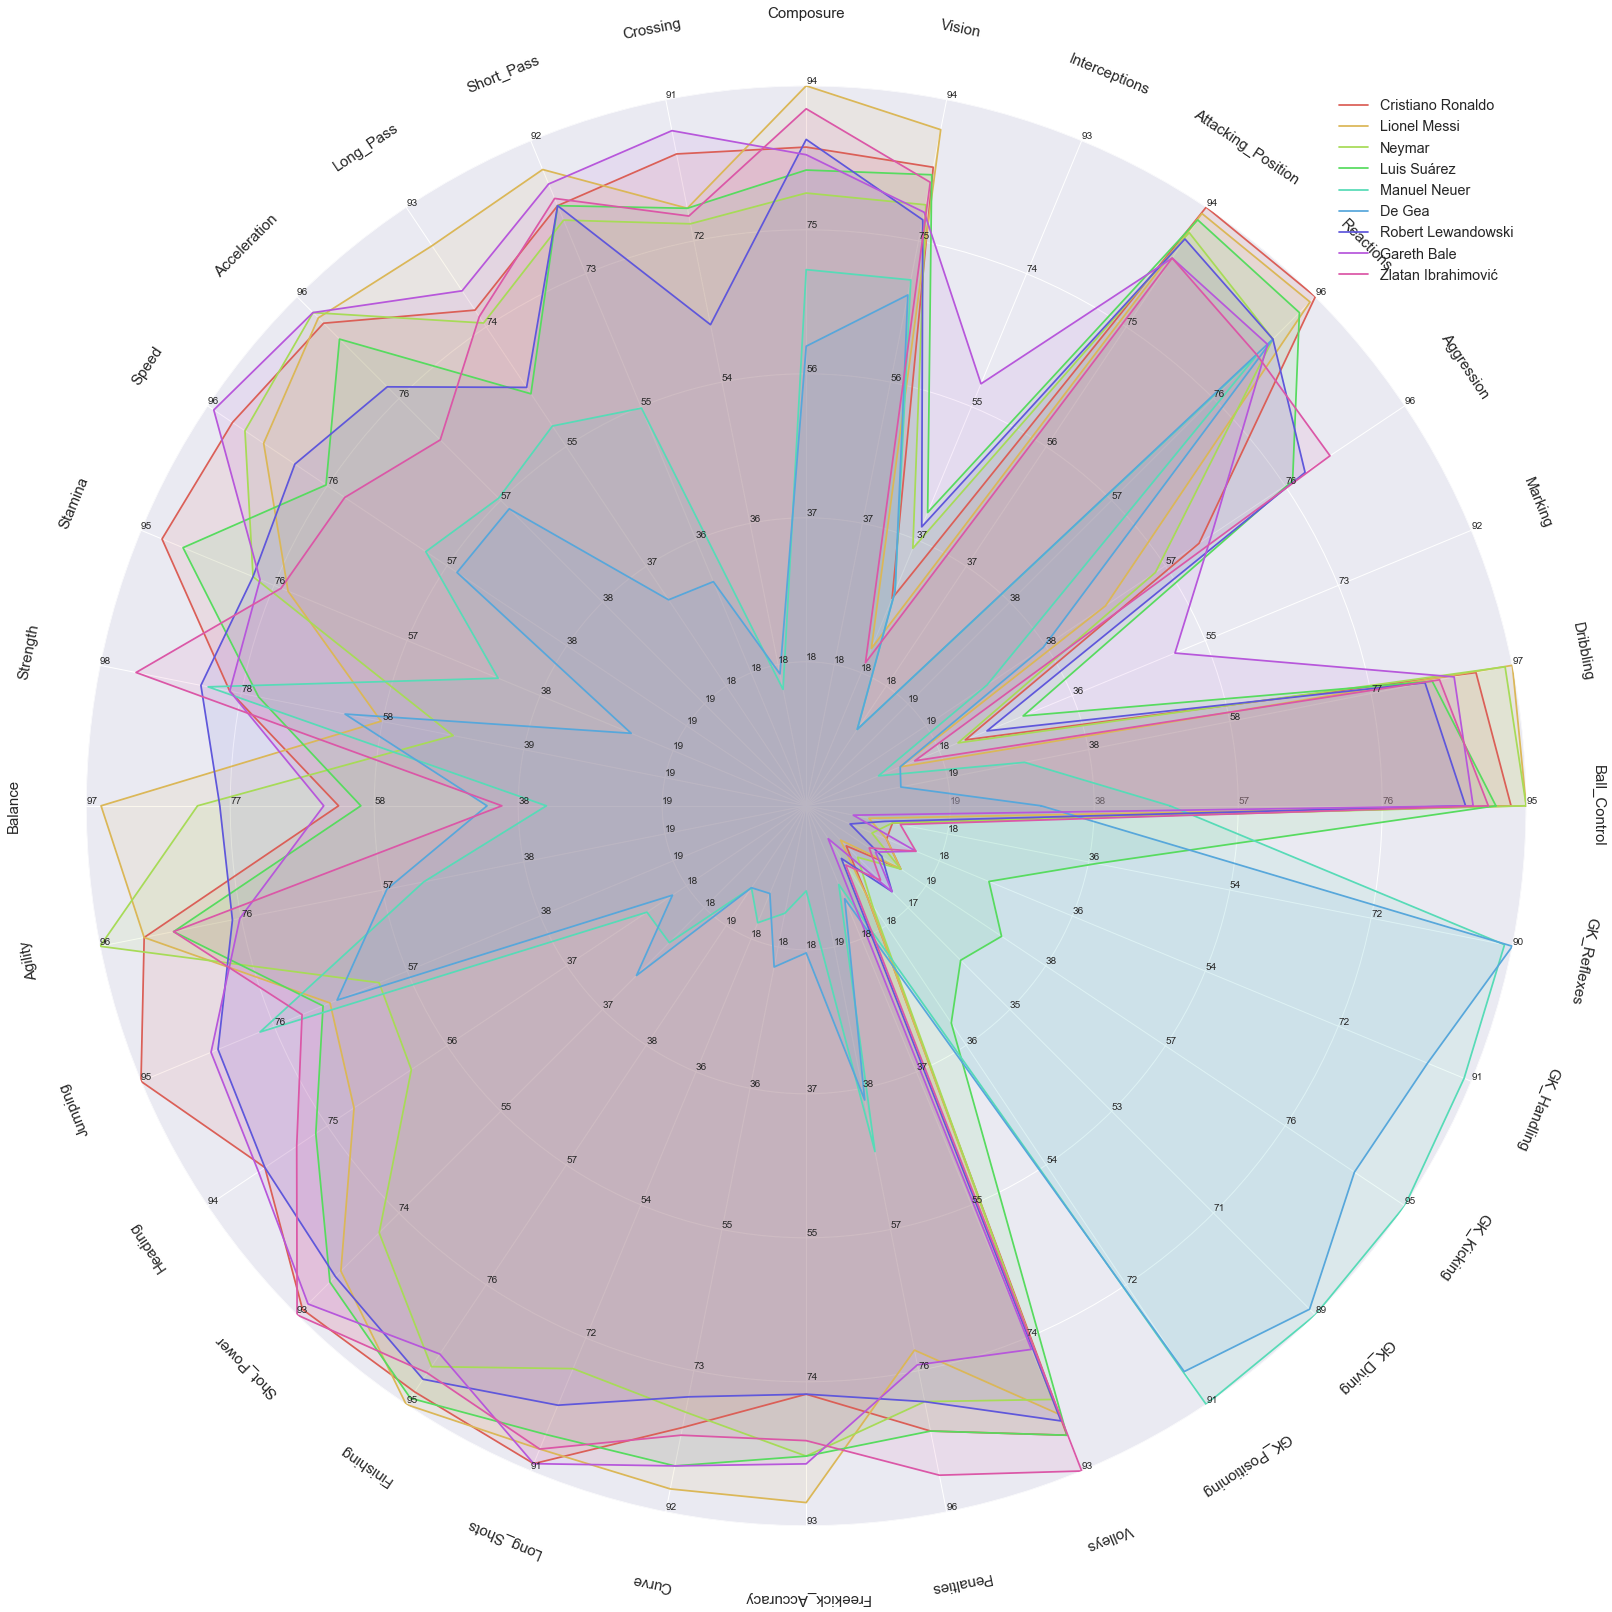

In [15]:
fig = plt.figure(figsize=(25,25))
radar = RadarChart(fig,attributes,ranges)
for player,data,color in zip(top_players,datas,colors):
    radar.plot(data,color = color,label=player)  
    radar.legend(loc = 1, fontsize = 'large')
    radar.fill(data, alpha = 0.1, color = color)
plt.show()

### One can look for a given attribute, how players performance differ!

### Plotting RadarChart of CR7, Messi and Eden Hazard(my fav.)

In [15]:
EdenHazard = df[df.loc[:,'Name']=='Eden Hazard'].T
EdenHazard

,11
Name,Eden Hazard
Nationality,Belgium
National_Position,LF
National_Kit,10
Club,Chelsea
Club_Position,LW
Club_Kit,10
Club_Joining,07/01/2012
Contract_Expiry,2020
Rating,89


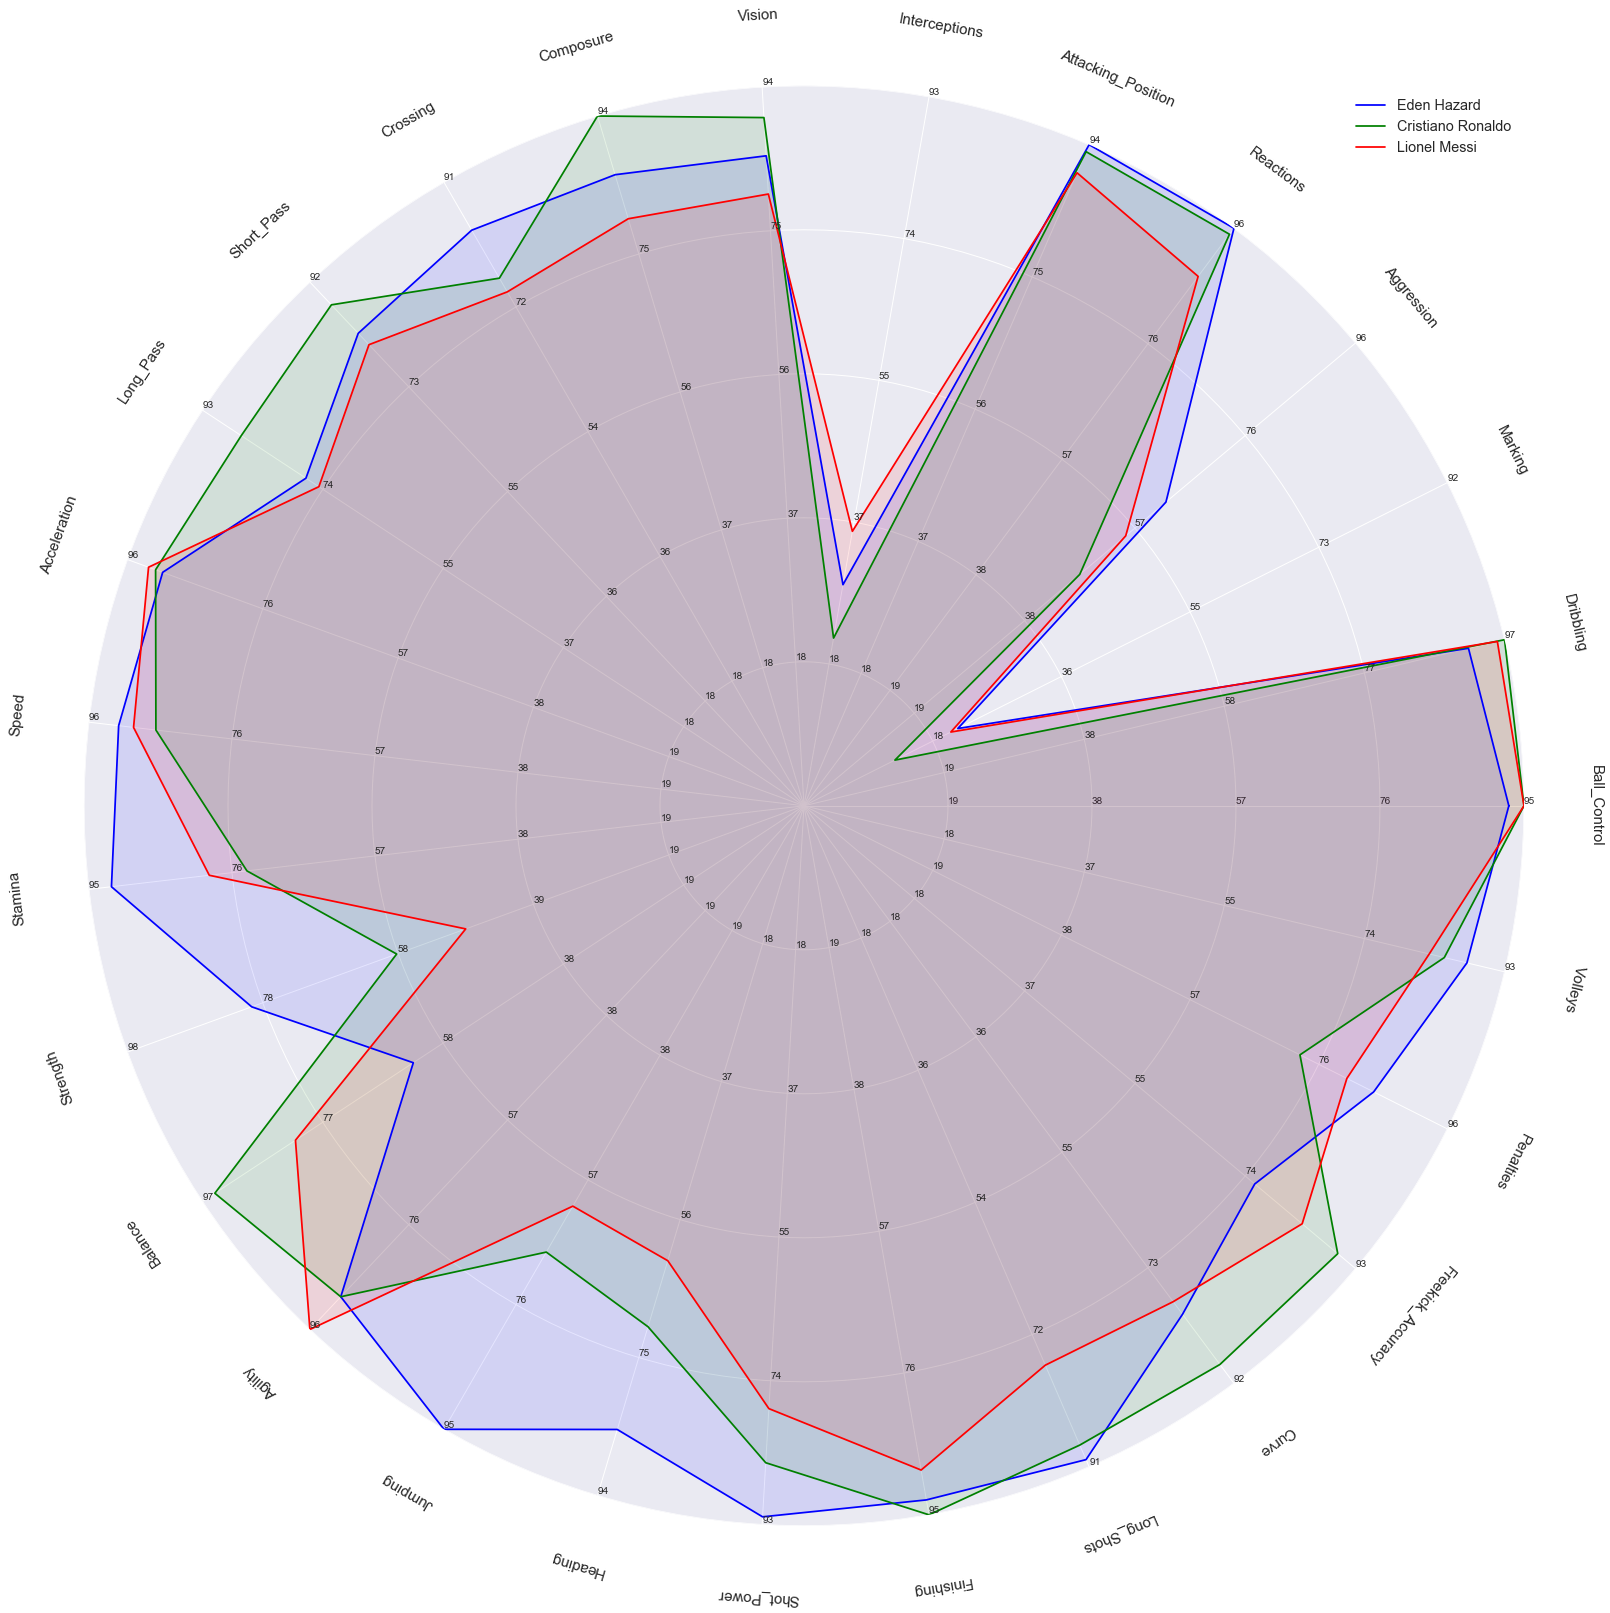

In [16]:
colors = ['blue','green','red']             
chosen_players = ['Eden Hazard','Cristiano Ronaldo','Lionel Messi']


attributes = ['Ball_Control','Dribbling','Marking','Aggression','Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
        ]
ranges = [[2**-20, df[attr].max()] for attr in attributes]
datas = df[attributes].values

fig = plt.figure(figsize=(25,25))
radar = RadarChart(fig,attributes,ranges)
for player,data,color in zip(chosen_players,datas,colors):
    radar.plot(data,color = color,label=player)  
    radar.legend(loc = 1, fontsize = 'large')
    radar.fill(data, alpha = 0.1, color = color)
plt.show()

### As you can see, Messi's Chart is almost inscribed inside other two's charts. Sorry Messi Fans.
### Eden Hazard Chart's as can be seen, is comparable with Cristiano Ronaldo. Yayyyy! No wonder why Zinedine Zidane want Hazard to join Madrid!


## Analysis using Heatmap

In [17]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

## Heatmap is used to plot the correlation between different attributes 
### if corr ~ 1, then 2 attributes are highly correlated and follow the same trend
### if corr ~ -1, then 2 attributes are highly correlated and floow the inverse/opposite trend
### if corr ~ 0 then 2 attributes are nearly independent of each other

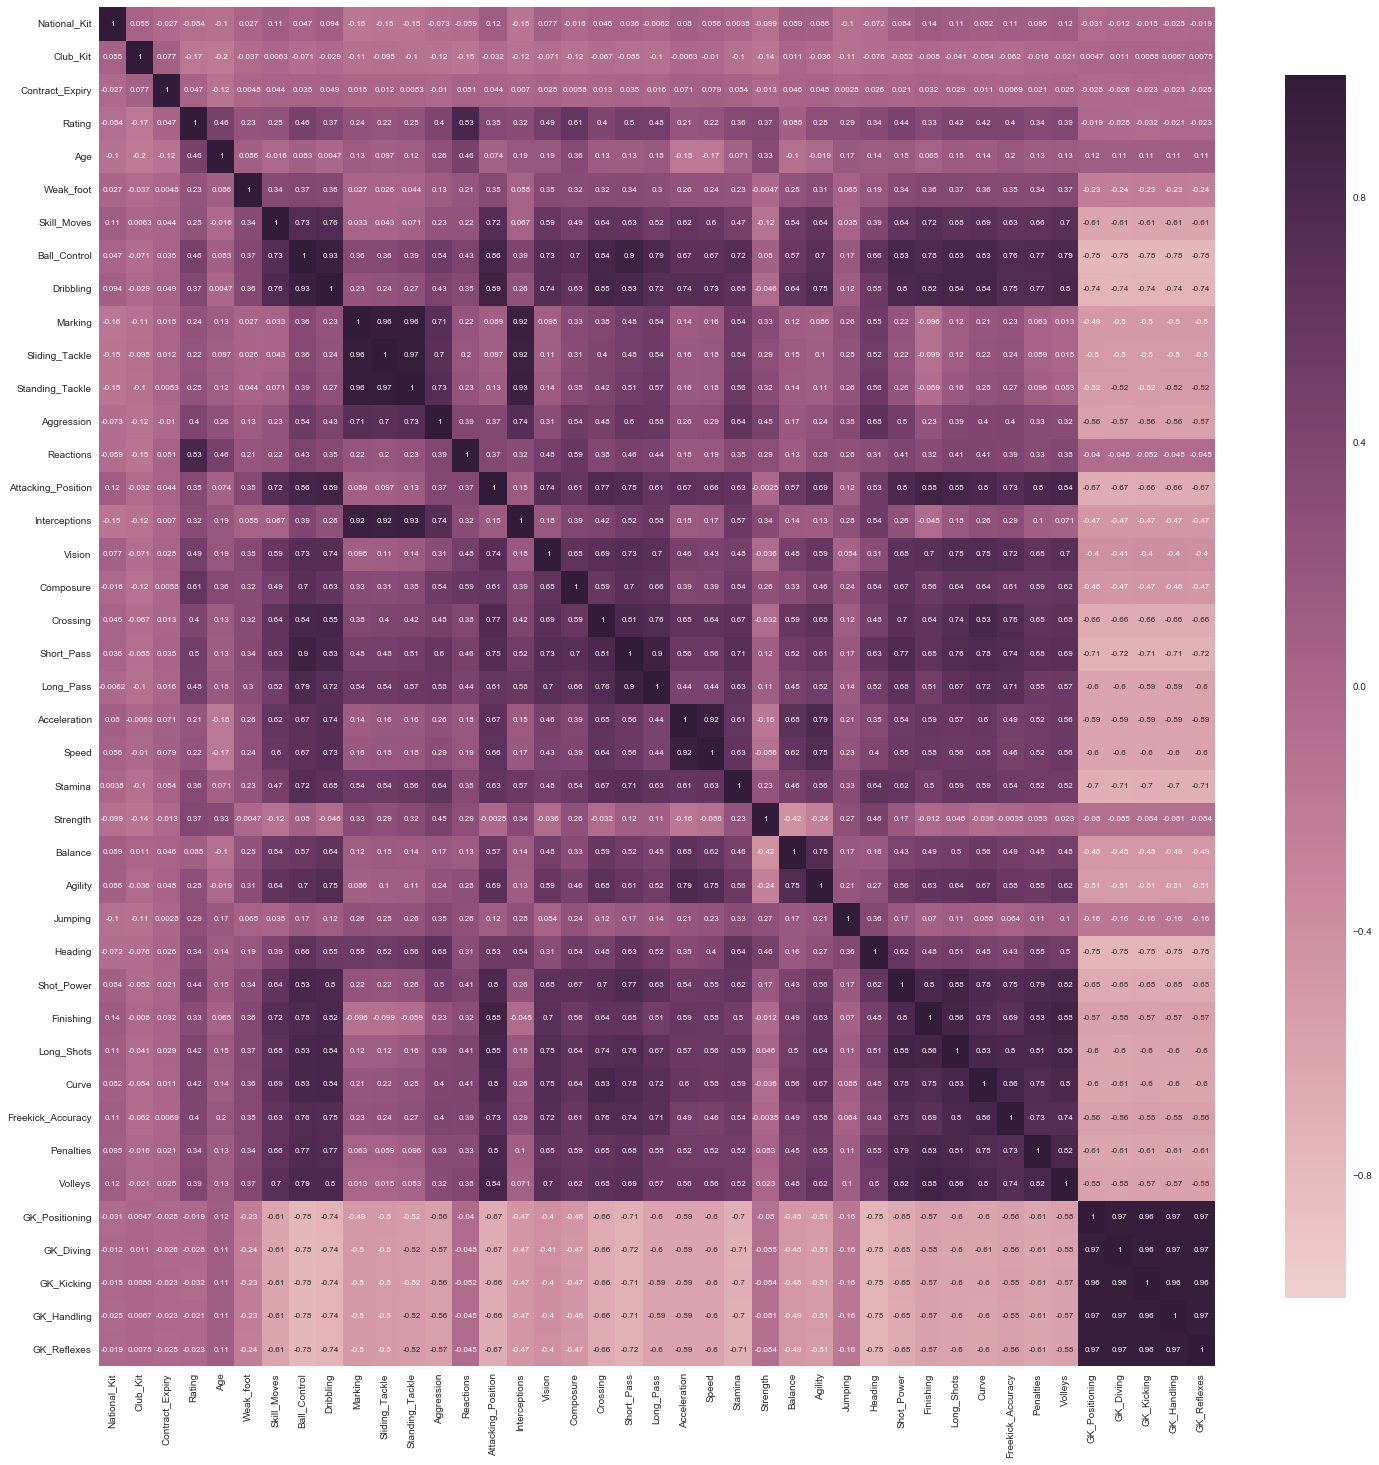

In [18]:
def heatmap(df,figsize=(25,25),annot_size = 8,cmap=sns.cubehelix_palette(start = 0.2,rot = 0.3,dark = 0.15,light = 0.85,as_cmap = True)):
    corr = df.corr()
    _,ax = plt.subplots(1,1,figsize=figsize)
    sns.heatmap(corr,
               cbar=True,
               cbar_kws={'shrink':0.9},
               annot=True,
               annot_kws={'fontsize':annot_size},
               cmap = cmap
               )
    plt.show()                                        ## double click on heatmap for better analysis
   
heatmap(df)

    

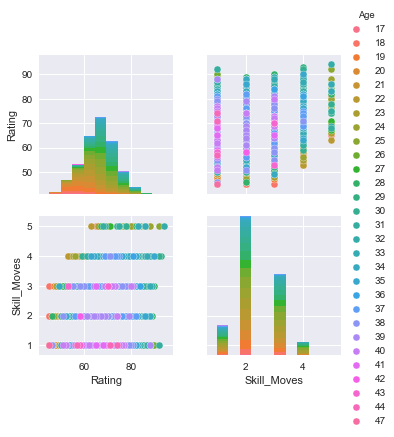

In [19]:
sns.pairplot(data = df,hue = 'Age',vars = ['Rating','Skill_Moves'])

# Lets find out which club has best attributes on average 

In [20]:
df['Club'].nunique()                        #no. of unique values, 633 club!
df.groupby(df['Rating'])['Club'].min()

633

Rating
45          Derry City
46         Bohemian FC
47       Bradford City
48            Aberdeen
49       AFC Wimbledon
50          1. FC Köln
51          AC Ajaccio
52          Aalborg BK
53          AC Ajaccio
54    1. FC Heidenheim
55          AC Ajaccio
56    1. FC Heidenheim
57          1. FC Köln
58        ADO Den Haag
59    1. FC Heidenheim
60    1. FC Heidenheim
61    1. FC Heidenheim
62          1. FC Köln
63          1. FC Köln
64    1. FC Heidenheim
65      1. FC Nürnberg
66    1. FC Heidenheim
67    1. FC Heidenheim
68    1. FC Heidenheim
69    1. FC Heidenheim
70    1. FC Heidenheim
71    1. FC Heidenheim
72          1. FC Köln
73          1. FC Köln
74    1. FC Heidenheim
75          1. FC Köln
76          1. FC Köln
77          1. FC Köln
78          1. FC Köln
79          1. FC Köln
80     1899 Hoffenheim
81          1. FC Köln
82           AS Monaco
83          1. FC Köln
84           AS Monaco
85    AS Saint-Étienne
86             Arsenal
87     Atlético Madrid
88  

# Miscellaneous Task
## 3 other files analysis

In [22]:
print(nat_namesDF.head())
print(nat_namesDF.shape)
print(nat_namesDF.describe(include=['O']))
print(pd.isnull(nat_namesDF).sum())                     # no null values

        Name                    url
0      Spain      /team/1362/spain/
1    Germany    /team/1337/germany/
2     Brazil     /team/1370/brazil/
3    Belgium    /team/1325/belgium/
4  Argentina  /team/1369/argentina/
(47, 2)
           Name                         url
count        47                          47
unique       47                          47
top     Belgium  /team/1330/czech-republic/
freq          1                           1
Name    0
url     0
dtype: int64


In [23]:
print(club_namesDF.head())                            #633 clubs verifying from df 
print(df['Club'].unique().size)                       # 633 clubs, hence verified.
print(club_namesDF.shape)
print(club_namesDF.describe(include=['O'])) 
print(pd.isnull(club_namesDF).sum())

             Name                       url
0       FC Bayern       /team/21/fc-bayern/
1     Real Madrid    /team/243/real-madrid/
2    FC Barcelona   /team/241/fc-barcelona/
3        Juventus        /team/45/juventus/
4  Manchester Utd  /team/11/manchester-utd/
633
(633, 2)
           Name                       url
count       633                       633
unique      633                       633
top     Rafaela  /team/111131/finn-harps/
freq          1                         1
Name    0
url     0
dtype: int64


In [24]:
print(player_namesDF.head())
print(player_namesDF.shape)
print(player_namesDF.describe(include=['O']))
print(pd.isnull(player_namesDF).sum())                    # no null values


                Name                               url
0  Cristiano Ronaldo  /player/20801/cristiano-ronaldo/
1       Lionel Messi      /player/158023/lionel-messi/
2             Neymar            /player/190871/neymar/
3        Luis Suárez  /player/176580/luis-su%C3%A1rez/
4       Manuel Neuer      /player/167495/manuel-neuer/
(17588, 2)
          Name                            url
count    17588                          17588
unique   17341                          17588
top     Felipe  /player/197170/kadeem-harris/
freq         6                              1
Name    0
url     0
dtype: int64


####  by players_nameDF.describe(): out of 17588 names, only 17341 are uniques.

# data cleaning to test different models


In [21]:
dummy_df = df.copy()                  # dummy_df is the dataset on which i will work on 

In [22]:
dummy_df.keys()
dummy_df.shape
dummy_df.select_dtypes(['O']).shape        # 12 are string type cols.
dummy_df.select_dtypes([np.number]).shape  #41 are int/float type columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

(17588, 53)

(17588, 12)

(17588, 41)

In [23]:
string_columns = dummy_df.select_dtypes(['O']).columns           #string type column names
string_columns

Index(['Name', 'Nationality', 'National_Position', 'Club', 'Club_Position',
       'Club_Joining', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date',
       'Preffered_Position', 'Work_Rate'],
      dtype='object')

# I will change height and weight to integers, remove BirthDate, since Age is already there

In [24]:
dummy_df.Height.head()       #string have 'cm' attatched as a unit which need to be removed first
dummy_df.Weight.head()       #string have 'kg' attached as a unit which need to be removed first 

0    185 cm
1    170 cm
2    174 cm
3    182 cm
4    193 cm
Name: Height, dtype: object

0    80 kg
1    72 kg
2    68 kg
3    85 kg
4    92 kg
Name: Weight, dtype: object

In [25]:
dummy_df['Height'] = dummy_df.Height.str.replace('cm',' ')                        #replace cm with space
dummy_df['Height'] = dummy_df.Height.str.strip()                                   #strip any spaces
dummy_df['Height'] = pd.to_numeric(dummy_df['Height'], errors='coerce')            #srting to int64 type
dummy_df['Height'].dtype                                                          #check data type        

dtype('int64')

In [26]:
dummy_df['Weight'] = dummy_df.Weight.str.replace('kg',' ')                        #replace cm with space
dummy_df['Weight'] = dummy_df.Weight.str.strip()                                   #strip any spaces
dummy_df['Weight'] = pd.to_numeric(dummy_df['Weight'], errors='coerce')            #srting to int64 type
dummy_df['Weight'].dtype                                                          #check data type    

dtype('int64')

In [27]:
dummy_df.Height.head()
dummy_df.Weight.head()


0    185
1    170
2    174
3    182
4    193
Name: Height, dtype: int64

0    80
1    72
2    68
3    85
4    92
Name: Weight, dtype: int64

In [28]:
dummy_df.drop(['Birth_Date'],inplace = True,axis = 1)

In [29]:
dummy_df.shape
string_columns =  dummy_df.select_dtypes(['O']).columns  # updating string col.

(17588, 52)

# I will encode these string valued columns, based on their unique values, and relevance
## first removing National_Kit and National_Position because of many Nan values


In [30]:
dummy_df.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             0
Club_Kit                  0
Club_Joining              0
Contract_Expiry           0
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina                   0
Strength            

In [31]:
dummy_df.drop(['National_Kit','National_Position'],inplace = True,axis = 1)
string_columns =  dummy_df.select_dtypes(['O']).columns  # updating string col.

### player's work rates (WR) are incredibly important in the way they behave on the pitch
### WR = attacking/defensive
#### so i will split this attribute into two and assign weightage as per the work/rate in that department


In [32]:
dummy_df[['w_r_attack','w_r_defence']] = dummy_df.Work_Rate.str.split('/',expand=True)

In [33]:
dummy_df.w_r_attack = dummy_df.w_r_attack.str.strip()
dummy_df.w_r_defence = dummy_df.w_r_defence.str.strip()

In [34]:
dummy_df.w_r_defence = dummy_df.w_r_defence.map({'High':3,'Medium':2,'Low':1})
dummy_df.w_r_attack = dummy_df.w_r_attack.map({'High':3,'Medium':2,'Low':1})


In [35]:

dummy_df.drop(['Work_Rate'],inplace = True,axis = 1)
string_columns = dummy_df.select_dtypes(['O']).columns     #updating string columns
string_columns                                             #'Name is not imp. for predecting', but I will keep it only for referencing
#dummy_df.drop(['Name'],axis = 1,inplace = True)
string_columns = dummy_df.select_dtypes(['O']).columns     #updating string columns



Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Joining',
       'Preffered_Foot', 'Preffered_Position'],
      dtype='object')

### Lets find out how w_r_attck and w_r_defence changes with age and for few selected top clubs!

In [36]:
dummy_df['Club']

0            Real Madrid
1           FC Barcelona
2           FC Barcelona
3           FC Barcelona
4              FC Bayern
5         Manchester Utd
6              FC Bayern
7            Real Madrid
8         Manchester Utd
9                Chelsea
10             FC Bayern
11               Chelsea
12           Real Madrid
13               Arsenal
14              Juventus
15                   PSG
16           Real Madrid
17       Manchester City
18        Manchester Utd
19       Atlético Madrid
20       Manchester City
21         Bor. Dortmund
22               Arsenal
23           Real Madrid
24       Atlético Madrid
25             FC Bayern
26                 Spurs
27              Juventus
28             FC Bayern
29           Real Madrid
              ...       
17558     Bray Wanderers
17559        Exeter City
17560     Bristol Rovers
17561    Shamrock Rovers
17562          Doncaster
17563            Dundalk
17564          Stevenage
17565      Bradford City
17566    Partick Thistle


In [37]:
chosen_clubs = ['FC Barcelona','Real Madrid','PSG','FC Bayern','Manchester Utd','Chelsea','Juventus']

In [41]:
truth_table = dummy_df['Club'].apply(lambda x: x=='Real Madrid' or x=='FC Barcelona' or x =='PSG' or x=='FC Bayern' or x =='Manchester Utd' or x == 'Chelsea' or x == ' Juventus')

In [42]:
plotting_df = dummy_df[truth_table]

In [43]:
plotting_df

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Age,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,w_r_attack,w_r_defence
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185,80,Right,32,LW/ST,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11,3,1
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170,72,Left,29,RW,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8,2,2
2,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174,68,Right,25,LW,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11,3,2
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182,85,Right,30,ST,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37,3,2
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193,92,Right,31,GK,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89,2,2
5,De Gea,Spain,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,193,82,Right,26,GK,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90,2,2
6,Robert Lewandowski,Poland,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185,79,Right,28,ST,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10,3,2
7,Gareth Bale,Wales,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183,74,Left,27,RW,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6,3,2
8,Zlatan Ibrahimović,Sweden,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,195,95,Right,35,ST,4,4,90,87,15,27,41,84,85,86,20,83,91,76,84,76,69,74,75,93,41,86,72,80,93,90,88,82,82,91,93,9,13,10,15,12,2,1
9,Thibaut Courtois,Belgium,Chelsea,GK,13.0,07/26/2011,2019.0,89,199,91,Left,24,GK,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89,2,2


(15, 40)

(15, 40)

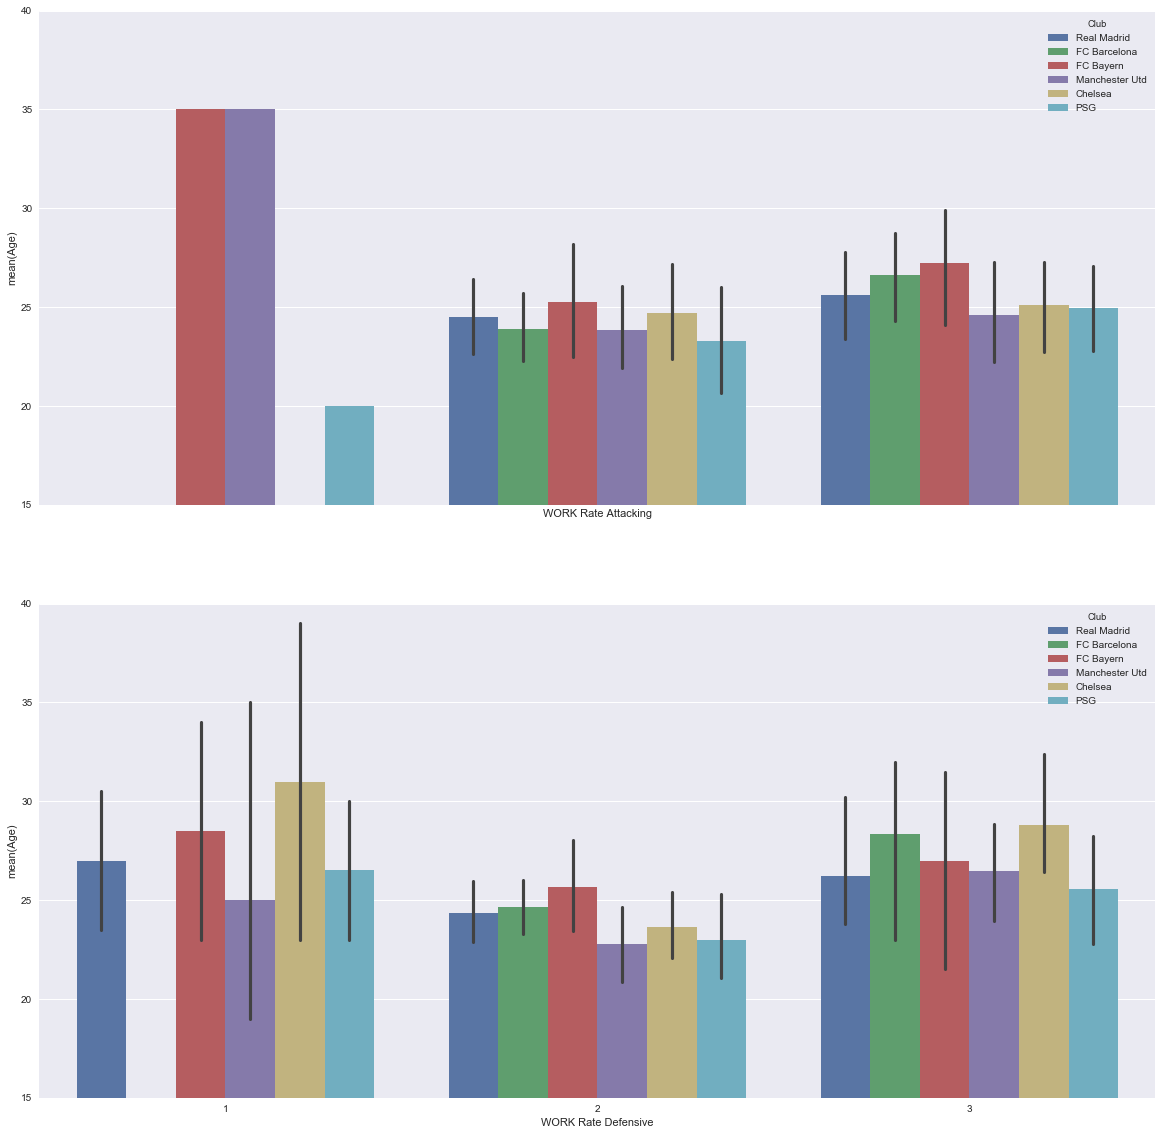

In [44]:
fig,ax = plt.subplots(2,1,sharex = True)
fig.set_figheight(20)
fig.set_figwidth(20)

sns.barplot(x = 'w_r_attack',y = 'Age',hue = 'Club',data = plotting_df,ax = ax[0])
ax[0].set_xlabel('WORK Rate Attacking')
ax[0].set_ylim(15,40)                        #min age taking 15, and max. 40

sns.barplot(x = 'w_r_defence',y = 'Age',hue = 'Club',data = plotting_df,ax = ax[1])
ax[1].set_xlabel('WORK Rate Defensive')
ax[1].set_ylim(15,40)                        #min age taking 15, and max. 40

In [45]:
string_columns.shape
string_columns

(7,)

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Joining',
       'Preffered_Foot', 'Preffered_Position'],
      dtype='object')

### count plot 

column: Name has these many unique values: 17341
column: Name has too many unique values to show on count plot.
column: Nationality has these many unique values: 160
column: Nationality has too many unique values to show on count plot.
column: Club has these many unique values: 633
column: Club has too many unique values to show on count plot.
column: Club_Position has these many unique values: 29


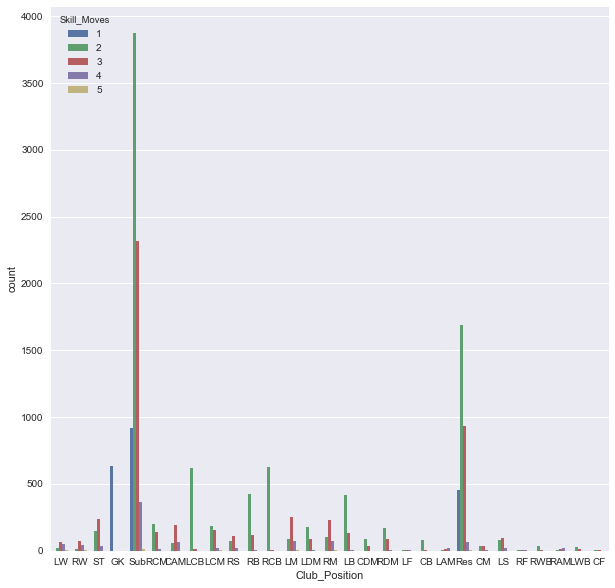

column: Club_Joining has these many unique values: 1677
column: Club_Joining has too many unique values to show on count plot.
column: Preffered_Foot has these many unique values: 2


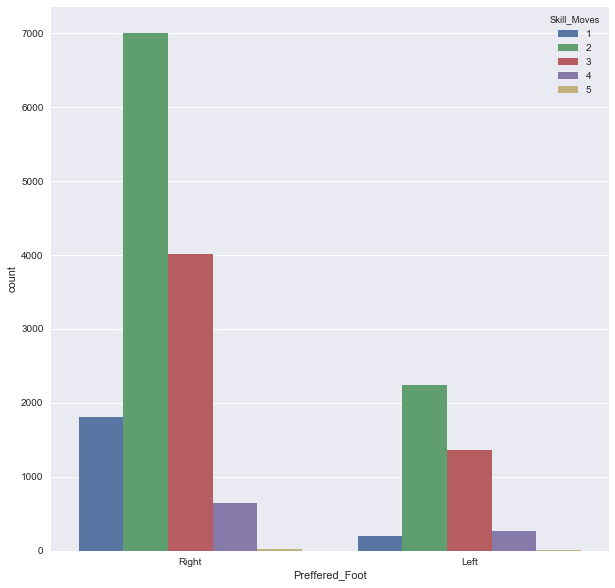

column: Preffered_Position has these many unique values: 292
column: Preffered_Position has too many unique values to show on count plot.


In [46]:
for column in string_columns:
    print("column: {} has these many unique values: {}".format(column,dummy_df[column].nunique()))
    if(dummy_df[column].nunique()<=30):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        ax = sns.countplot(x=column,hue='Skill_Moves',data = dummy_df,ax = ax)
        plt.show()
    else:
        print("column: {} has too many unique values to show on count plot.".format(column))



mapping Right with 1 and Left with 0 in Preffered_Foot attribute

In [47]:
dummy_df.Preffered_Foot = dummy_df.Preffered_Foot.map({'Right':1,'Left':0})


In [48]:
string_columns = dummy_df.select_dtypes(['O']).columns
string_columns.shape
string_columns

(6,)

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Joining',
       'Preffered_Position'],
      dtype='object')

#### Nationality matters, so i will cluster nations into different areas, using basemaps later on( in next Notebook), 
#### will delete Preffered_Position,Club_Joining, Label encode the rest

## first lets see how many players got  preferred position in their club!!!
### making a new column, indicating this attribute which may affect their ratings, i.e. player whose preferred position is club position is likely to perform bettern than others

In [49]:
(dummy_df['Preffered_Position'] == dummy_df['Club_Position']).sum()   #1891 players who play in club_position has their preffered_position
dummy_df['club_preferred_position_score'] = dummy_df['Preffered_Position'] == dummy_df['Club_Position']
dummy_df['club_preferred_position_score'].dtype                     #bool
dummy_df['club_preferred_position_score'] = dummy_df['club_preferred_position_score'].astype(int)
dummy_df['club_preferred_position_score'].shape

1891

dtype('bool')

(17588,)

In [50]:
dummy_df.drop(['Preffered_Position','Club_Joining'],axis = 1,inplace = True)

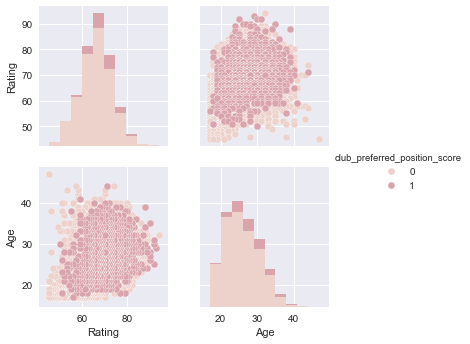

In [51]:
sns.pairplot(data = dummy_df, hue = 'club_preferred_position_score', vars = ['Rating','Age'],palette = sns.cubehelix_palette())

In [52]:
string_columns = dummy_df.select_dtypes(['O']).columns         #updating
string_columns.shape                                           #will label encode all columns in it
string_columns

(4,)

Index(['Name', 'Nationality', 'Club', 'Club_Position'], dtype='object')

In [53]:
string_columns[1:]

Index(['Nationality', 'Club', 'Club_Position'], dtype='object')

In [54]:
le = LabelEncoder()
for column in string_columns[1:]:                                    #not encoding name, so as to use them for referencing later on
    dummy_df[column] = le.fit_transform(dummy_df[column])

In [55]:
string_columns = dummy_df.select_dtypes(['O']).columns 
string_columns.shape                                           #finally 1, Phewww, not encoding Name

(1,)

# now since I have data only in numeric vals, i can test different models,
## My Target/Class/output will be :
### 1) Skill_Moves for Classification Models
### 2) Ratings for Regression Models
# Aim: to predict skill moves and ratings for a given player

In [56]:
output_df_classification  = dummy_df['Skill_Moves']
output_df_regression = dummy_df['Rating']

In [57]:
dummy_df.drop(['Skill_Moves','Rating'],axis = 1,inplace = True)

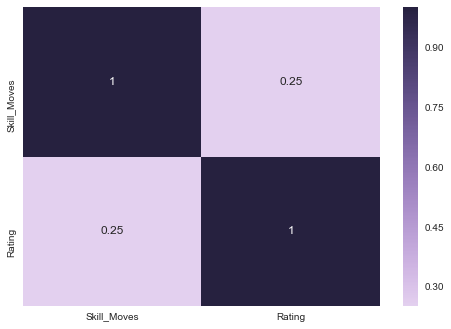

In [58]:
# checking regression and classification output correlation using heatmap

_,ax = plt.subplots(1,1)
outputDF = pd.DataFrame([output_df_classification,output_df_regression]).T
corr = outputDF.corr()
sns.heatmap(corr,
           ax = ax,
           cmap = sns.cubehelix_palette(start = 0,rot=0.1,as_cmap = True),
           annot = True,
            annot_kws={'fontsize':12},
            cbar = True
           )
plt.show()


### 0.25 score for correlation between Rating and Skill_Moves , i.e. not much dependent on each other
### because of positive correlation, Rating and Skill_Moves have a similar trend

In [59]:
dummy_df.shape
output_df_classification.shape
output_df_regression.shape
### copying dummy_df to inputDF for model testing
inputDF = dummy_df.copy()


(17588, 48)

(17588,)

(17588,)

## reducing features

### as from the first heatmap, we saw high correlation between different GK attributes, I will only make their correlation map

In [60]:
GK_attributes = df[['GK_Positioning','GK_Kicking','GK_Handling','GK_Reflexes']]

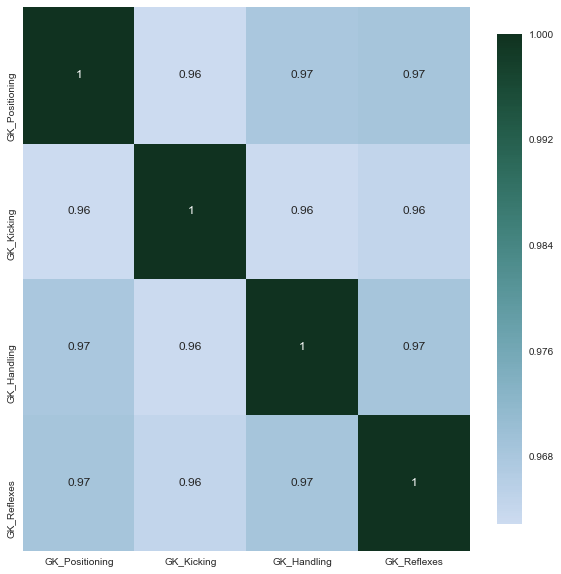

In [61]:
heatmap(GK_attributes,figsize=(10,10),annot_size = 12,cmap = sns.cubehelix_palette(start = -1,rot = 0.3,as_cmap = True))   

### since 5 attributes of GK are highly correlated with each other, I will use only one GK attribute,
#### GK_Diving chosen for all

In [62]:
inputDF.drop(['GK_Positioning','GK_Kicking','GK_Handling','GK_Reflexes'],inplace = True,axis = 1)

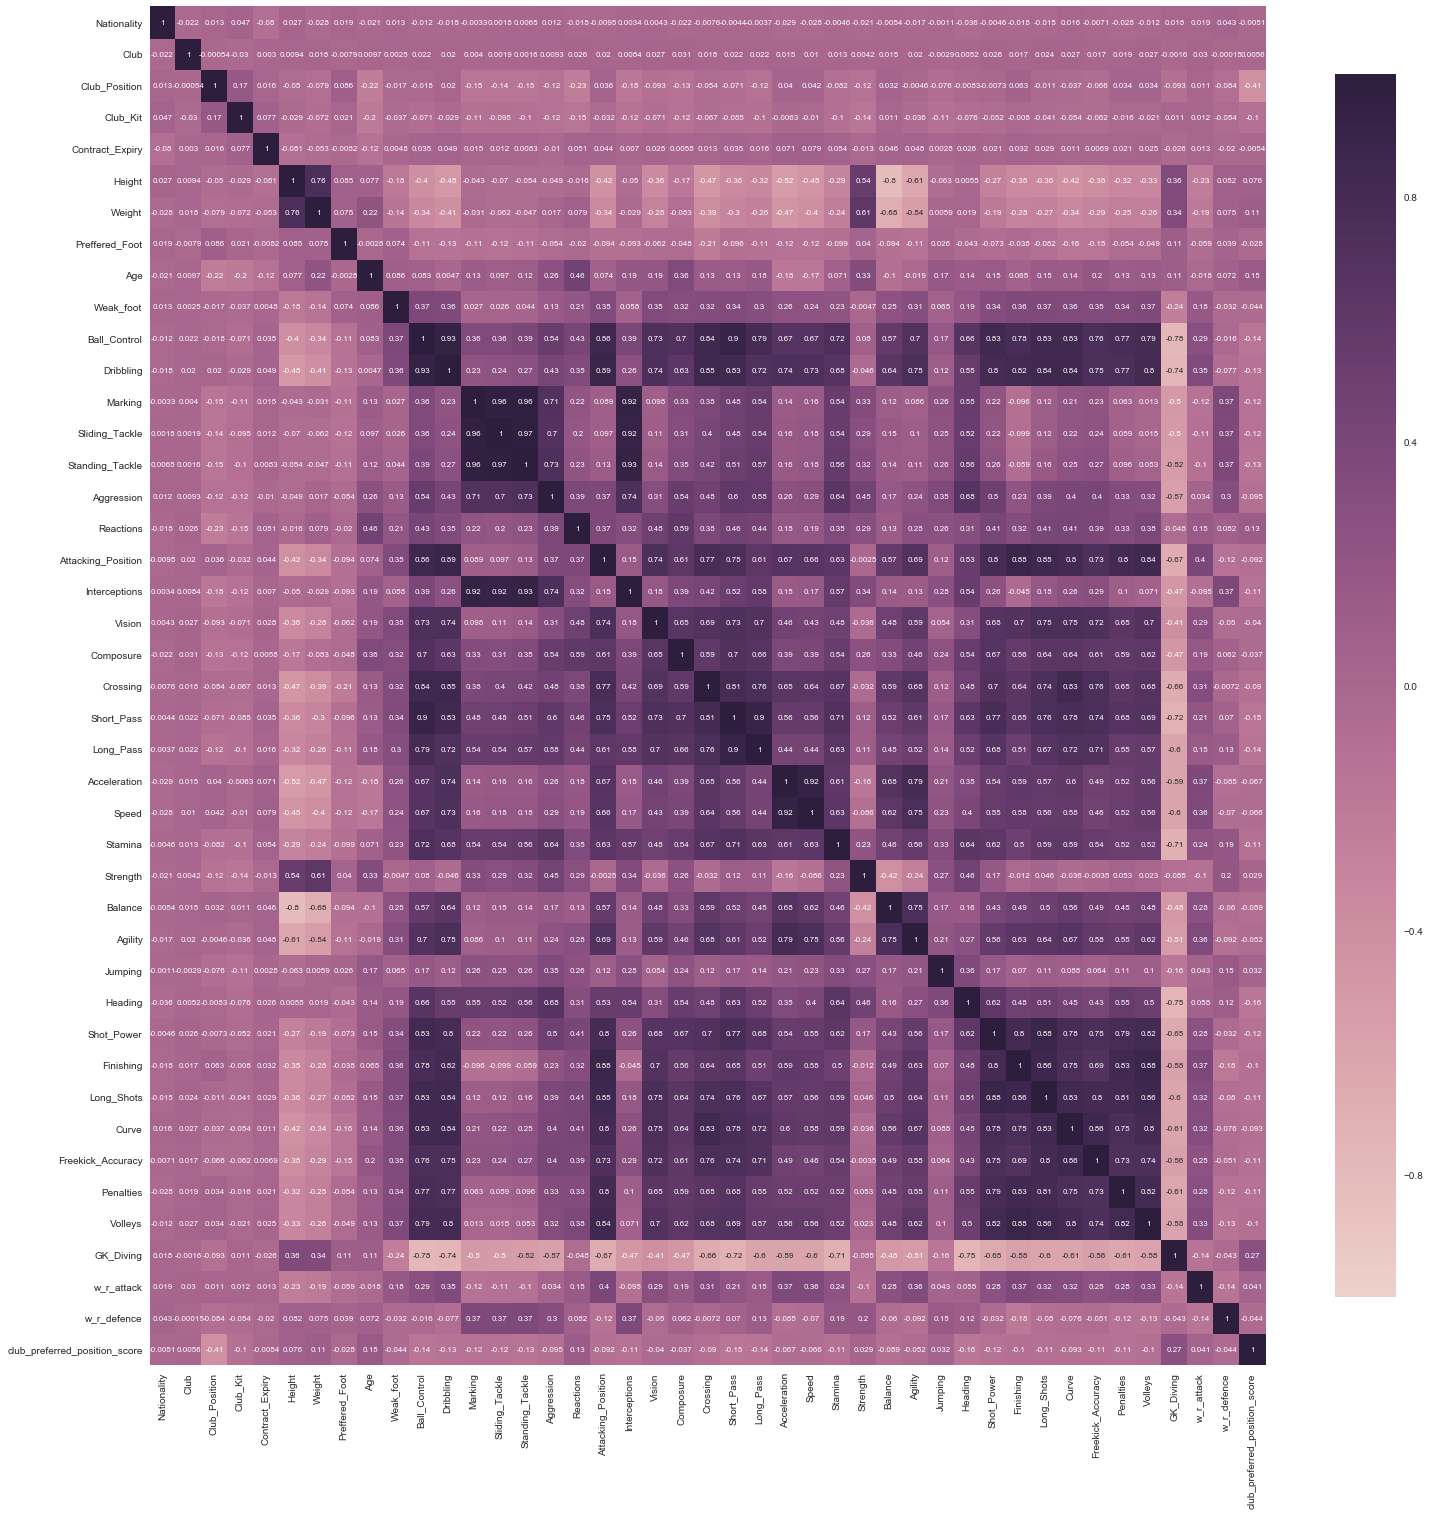

In [63]:
heatmap(inputDF,cmap = sns.cubehelix_palette(start = 6,rot = 0.4,as_cmap=True))

#### from more dense area for attribtes from Shot_Power to Volleys, plotting these attributes heatmap alone
#### also Marking , Sliding Tackle, Standing_Tackle are highly correlated, so choosing Marking only
#### similarly taking dribbling only, and mitting ball control

In [64]:
inputDF.drop(['Ball_Control'],axis = 1,inplace = True)

In [65]:
inputDF.drop(['Standing_Tackle','Sliding_Tackle'],inplace = True,axis = 1)

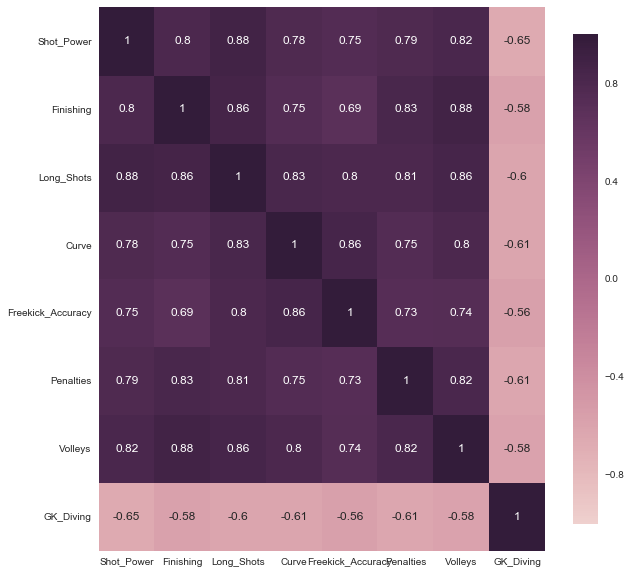

In [66]:
heatmap(df[['Shot_Power','Finishing','Long_Shots','Curve','Freekick_Accuracy','Penalties','Volleys','GK_Diving']],figsize=(10,10),annot_size=12)

### Long_Shots and Shot_Power are highly correlated with correlance of 0.88, which is obvious, so only omitting one of these features

In [67]:
inputDF.drop(['Long_Shots'],inplace = True,axis = 1)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [69]:
x_trainR,x_testR,y_trainR,y_testR = train_test_split(inputDF,output_df_regression,random_state = 42)  #R for regression
train_names = x_trainR.iloc[:,0]
x_trainR = x_trainR.iloc[:,1:]
test_names = x_testR.iloc[:,0]
x_testR = x_testR.iloc[:,1:]
inputDF.shape

(17588, 40)

In [70]:
model = LinearRegression()

In [71]:
start = time.time()
model.fit(x_trainR,y_trainR)
print("fitting time : {}".format(time.time()-start))

start = time.time()
y_predR = model.predict(x_testR)
print("\nLinearRegression score is :")         # comes out to be 0.8456! that's really good because of just using simple LinearRegression
model.score(x_testR,y_testR)                   #Returns the coefficient of determination R^2 of the prediction.
print("testing time : {}".format(time.time() - start))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fitting time : 0.08372855186462402

LinearRegression score is :


0.82105723784443385

testing time : 0.007017850875854492


In [72]:
y_predR.shape
y_testR.shape
np.isnan(y_predR).sum()
type(y_testR)
type(y_predR)

(4397,)

(4397,)

0

pandas.core.series.Series

numpy.ndarray

In [73]:
comparisionRDF = pd.DataFrame(y_testR)
comparisionRDF['predicted'] = y_predR
comparisionRDF['player Name'] = test_names
comparisionRDF['error in Prediction'] = np.abs(comparisionRDF['predicted'] - comparisionRDF['Rating'])
comparisionRDF

,Rating,predicted,player Name,error in Prediction
3827,72,73.387527,Almen Abdi,1.387527
1350,76,73.316150,Jeffrey Gouweleeuw,2.683850
6510,68,64.081273,Antonio Mlinar Delamea,3.918727
13701,61,58.426763,Baba Traoré,2.573237
2281,74,74.985756,Trent Sainsbury,0.985756
17020,53,58.952055,Gareth Ainsworth,5.952055
12267,63,70.412804,Andy Rose,7.412804
10565,65,67.787905,Chinedu Ede,2.787905
1441,76,73.585189,Michel Macedo,2.414811
12224,63,64.937829,Andreas Vindheim,1.937829


In [74]:
model.get_params()              
weights = model.coef_           #coefficients of all features/columns in inputDF.iloc[:,1:]
bias = model.intercept_         #constant term in a linear line equation
print("weights are:")
weights
print("Constant is :",bias)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

weights are:


array([  1.21529432e-04,   1.87415769e-04,  -3.51274679e-02,
        -5.54879379e-03,   8.88398953e-02,   3.37002595e-02,
         2.04292016e-02,  -1.72981112e-01,   6.99208453e-02,
         2.41014302e-01,   6.64668288e-02,   1.48173811e-02,
         5.61106233e-03,   3.24623215e-01,  -5.34568033e-02,
         9.27606938e-03,   4.61707102e-03,   5.73925258e-02,
         1.79381901e-02,   1.24488648e-01,  -1.00924209e-02,
         2.34691278e-02,   4.16609624e-02,  -9.62294621e-04,
         4.07961680e-02,  -1.92013508e-02,   1.37540675e-02,
         1.72819347e-02,   8.14472127e-02,   1.97010839e-02,
         2.49019284e-02,   1.29278848e-02,  -1.73172279e-03,
         8.54552524e-04,  -8.48032097e-03,   2.45034068e-01,
        -4.04047793e-02,  -1.09806442e-01,   5.60053888e-01])

Constant is : -174.050649502


In [75]:
# cross_val_score result
crossScore = cross_val_score(model,X=inputDF.iloc[:,1:],y=output_df_regression,cv=KFold(n_splits = 5,shuffle = True,random_state = 42)).mean()
crossScore   #0.8415, similar to simple score method

0.81678037010492022

### Linear Regression found to be a good model to predict Rating with score of 0.84 
#### Now lets find out, if SVR is better than Linear Model to predict the same Regression problem


In [76]:
from sklearn.svm import LinearSVR,SVR

In [77]:
model = LinearSVR(random_state = 42)


In [78]:
start = time.time()
model.fit(x_trainR,y_trainR)
print("fitting time : {}".format(time.time()-start))

start = time.time()
y_predR = model.predict(x_testR)
score=model.score(x_testR,y_testR)
score
print("Testing time : {}".format(time.time()-start))

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

fitting time : 3.275712013244629


0.75070181776311307

Testing time : 0.006516933441162109


### not a better model for this dataset, LinearSVR, score is varying  too much, if I dont set random_state
#### score is 0.70 


<table>
    <caption>Comparision of Different Regression Models</caption>
    
    <tr>
        <th>Model Name</th>
        <th>Fitting Time</th>
        <th>Testing Time</th>
        <th>Score</th>
    </tr>
    
    <tr>
        <td>LinearRegression</td>
        <td>0.03058</td>
        <td>0.00802</td>
        <td>0.83119</td>
    </tr>
    
    <tr>
        <td>LinearSVR</td>
        <td>3.68930</td>
        <td>0.00751</td>
        <td>0.70729</td>
    </tr>


</table>


In [79]:
x_trainC,x_testC,y_trainC,y_testC = train_test_split(inputDF,output_df_classification,random_state=42)
train_names = x_trainC.iloc[:,0]
x_trainC = x_trainC.iloc[:,1:]
test_names = x_testC.iloc[:,0]
x_testC = x_testC.iloc[:,1:]

In [80]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# first scaling features, then applying
## 1). SupportVectorClassifier without PCA 

In [81]:
sc = StandardScaler()
scaled_x_trainC = sc.fit_transform(x_trainC)
scaled_x_trainC = pd.DataFrame(scaled_x_trainC)
scaled_x_testC = sc.transform(x_testC)
scaled_x_testC = pd.DataFrame(scaled_x_testC)

In [82]:
model = SVC(kernel='linear')
model.fit(scaled_x_trainC.iloc[:,:],y_trainC.iloc[:])
model.score(scaled_x_testC.iloc[:,:],y_testC)
model.support_.shape

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7928132817830339

(6303,)

In [83]:
model = SVC(kernel = 'rbf')
model.fit(scaled_x_trainC,y_trainC)
model.score(scaled_x_testC,y_testC)
model.support_.shape

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.79395042074141464

(6629,)

## 2). Support Vector Classifier with PCA

In [84]:
pca = PCA(n_components = 2)

In [85]:
pca_x_trainC = pca.fit_transform(scaled_x_trainC)
pca_x_testC = pca.transform(scaled_x_testC)
model = SVC(kernel = 'linear')
model.fit(pca_x_trainC,y_trainC)
model.score(pca_x_testC,y_testC)
model.support_.shape

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.76233795769843071

(6842,)

In [86]:
model = SVC(kernel='rbf')
model.fit(pca_x_trainC,y_trainC)
model.score(pca_x_testC,y_testC)
model.support_.shape

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.76438480782351603

(7069,)

## Using K Nearest Neighbors i.e. KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
start = time.time()
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_trainC,y_trainC)
print("fitting time: ",time.time()-start)
start = time.time()
print("score of KNN classification:")
model.score(x_testC,y_testC)
print("testing time: ",time.time()-start)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

fitting time:  0.04612326622009277
score of KNN classification:


0.76256538549010688

testing time:  0.7394669055938721



<table>
    <caption>Comparision of Different Classification Models</caption>
    
    <tr>
        <th>Model Name</th>
        <th>Fitting Time</th>
        <th>Testing Time</th>
        <th>Score</th>
    </tr>
    
    <tr>
        <td>SVM without PCA</td>
        <td>0.02657</td>
        <td>0.00701</td>
        <td>0.8456</td>
    </tr>
    
    <tr>
        <td>SVM with PCA</td>
        <td>3.36240</td>
        <td>0.00701</td>
        <td>0.67558</td>
    </tr>
    
    <tr>
        <td>KNN</td>
        <td>0.0441</td>
        <td>0.7474</td>
        <td>0.76256</td>


</table>

## You have reached the END :)